# Import Statements

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Import Dataframes

In [49]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

In [97]:
df_tesla.tail()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
119,2020-05-01,16,167.000000
120,2020-06-01,17,215.962006
121,2020-07-01,24,286.152008
122,2020-08-01,23,498.320007
123,2020-09-01,31,407.339996


In [11]:
print(f'Largest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [7]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [12]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [13]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [16]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [17]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [19]:
print(f'largest BTC News Search: {df_btc_search["BTC_NEWS_SEARCH"].max()}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

In [26]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [27]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [35]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 2


Remove Missing Values

In [ ]:
df_btc_price.dropna(inplace=True)
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

### Convert Strings to DateTime Objects

In [139]:
df_tesla["MONTH"] = pd.to_datetime(df_tesla["MONTH"])
df_unemployment["MONTH"] = pd.to_datetime(df_unemployment["MONTH"])
df_btc_search["MONTH"] = pd.to_datetime(df_btc_search["MONTH"])
df_btc_price["MONTH"] = pd.to_datetime(df_btc_price["DATE"])

In [140]:
print(type(df_tesla["MONTH"][1]))
print(type(df_unemployment["MONTH"][1]))
print(type(df_btc_search["MONTH"][1]))
print(type(df_btc_price["DATE"][1]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


### Converting from Daily to Monthly Data

In [141]:
df_btc_monthly = df_btc_price.resample("M", on="MONTH").last()

# Data Visualisation

### Tesla Stock Price v.s. Search Volume

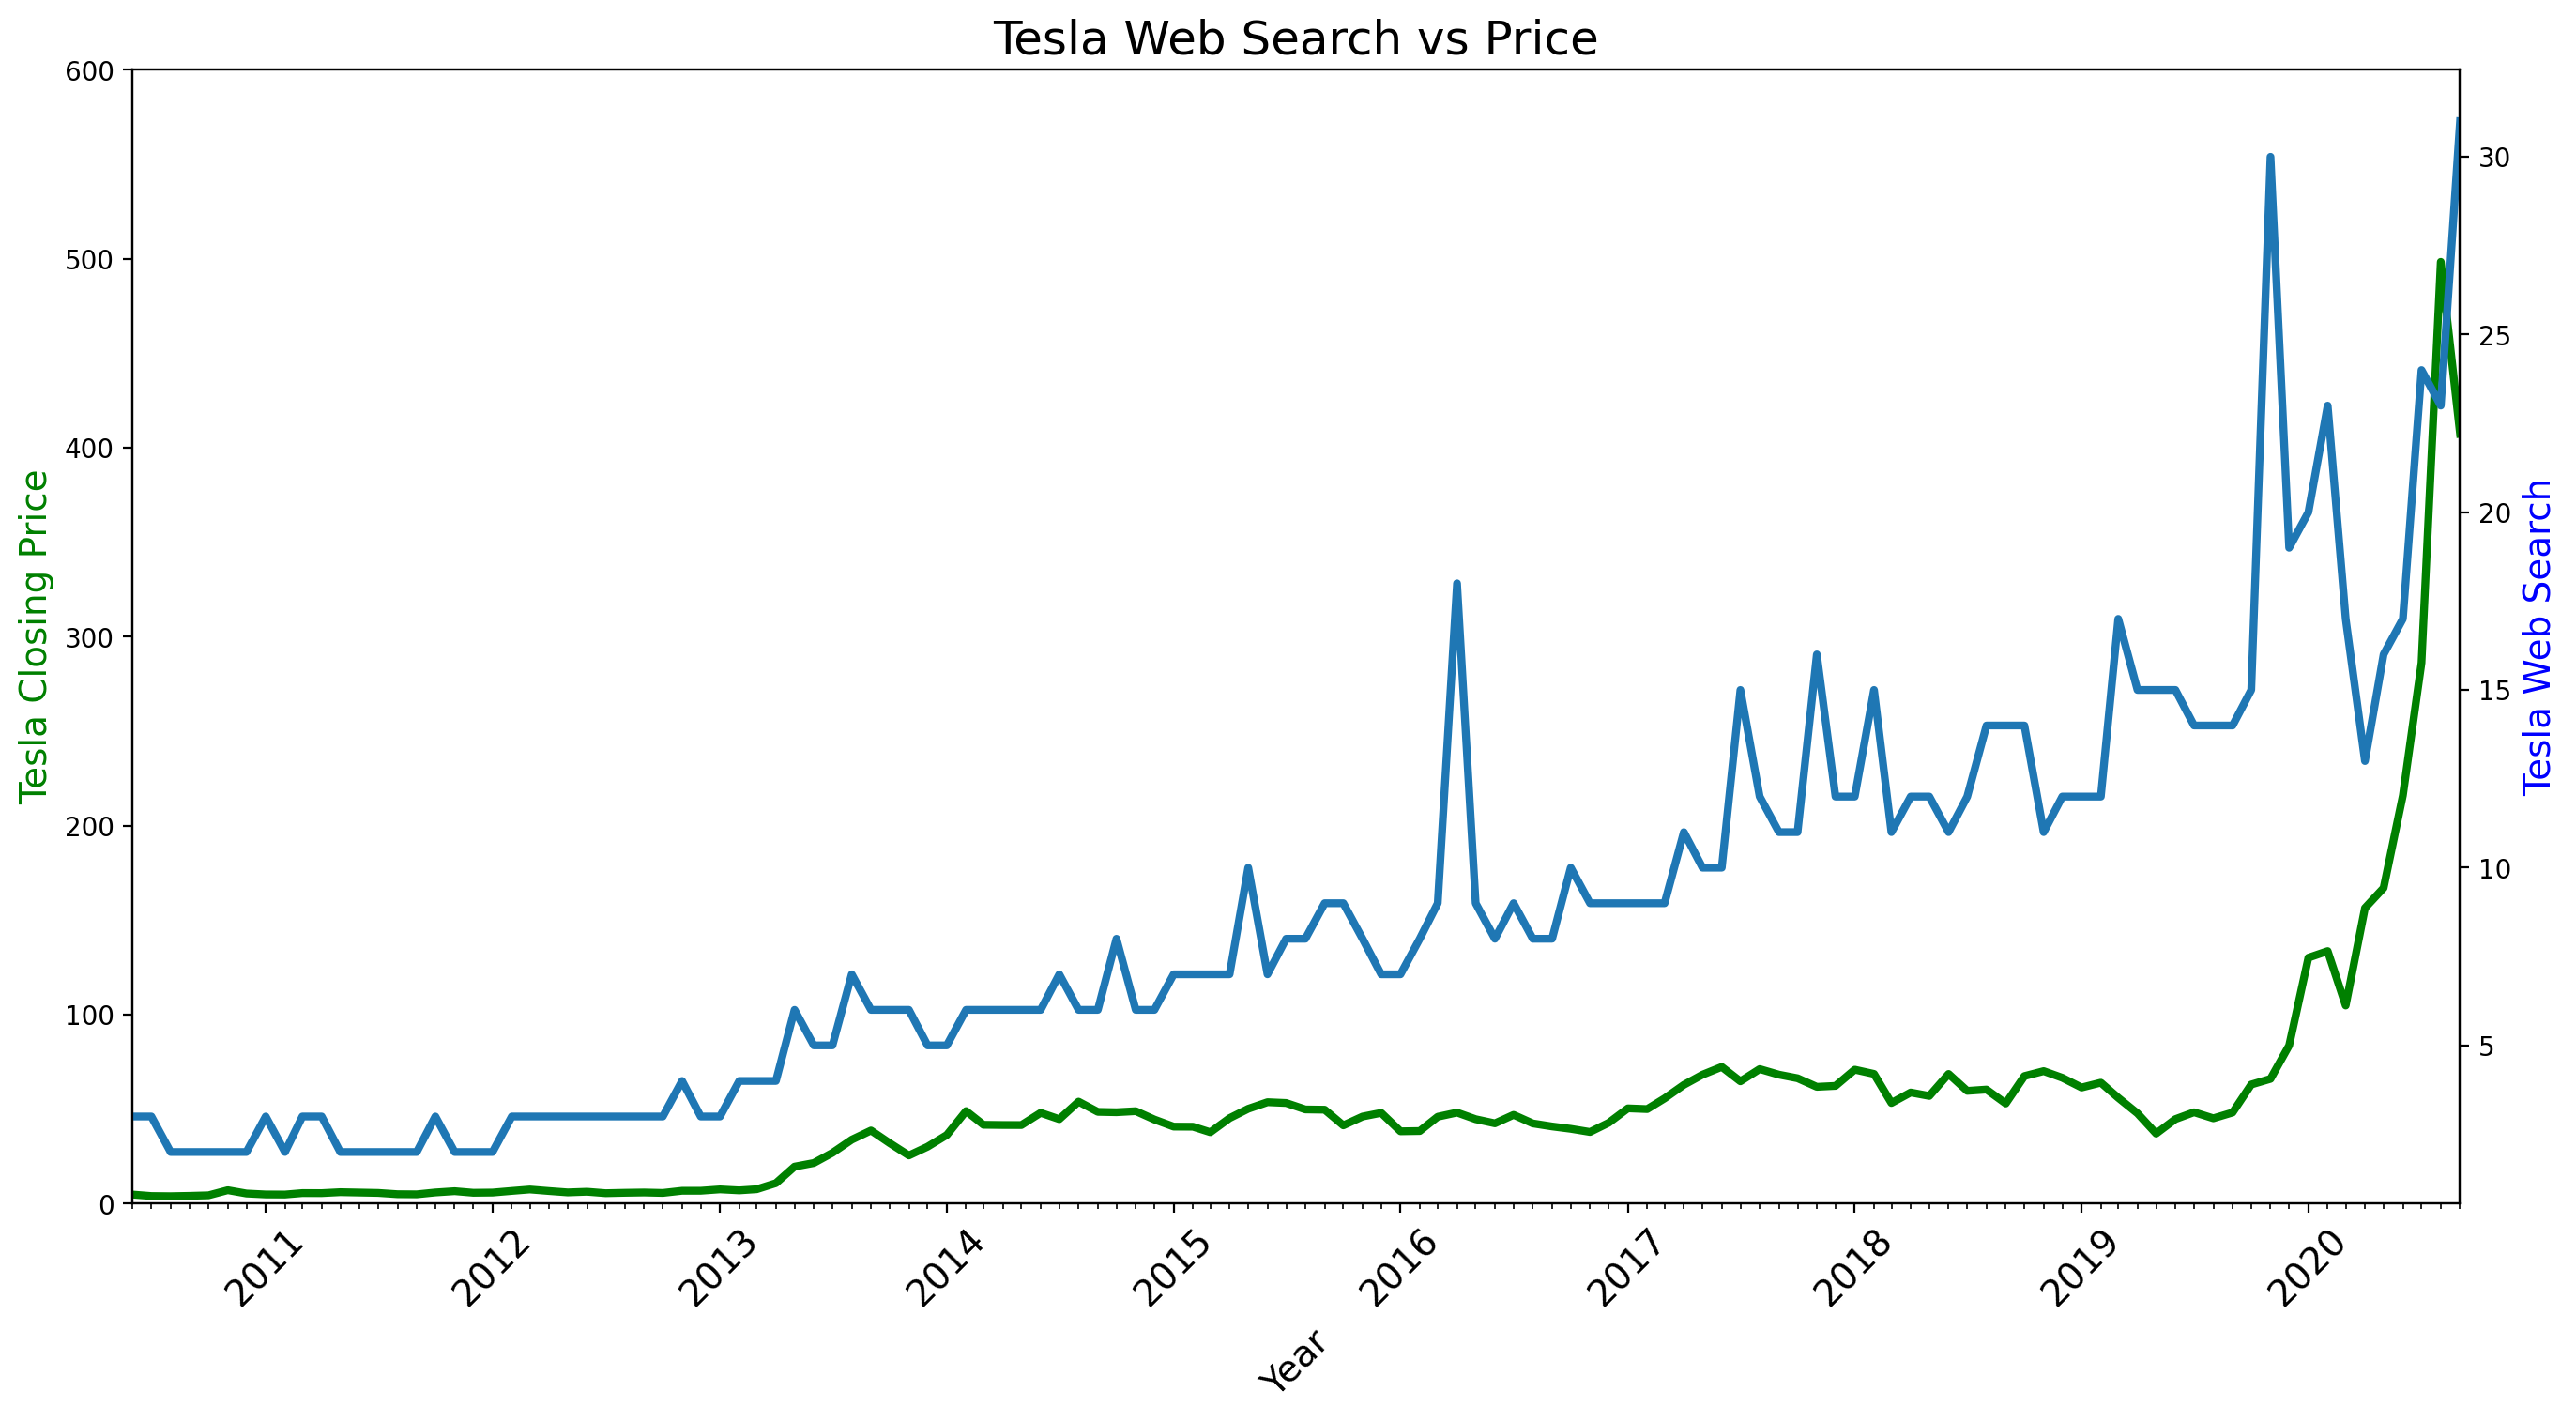

In [131]:
plt.figure(figsize=(16, 8), dpi=200)
plt.title("Tesla Web Search vs Price", fontsize=18)

plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("Tesla Closing Price", color="green", fontsize=14)
ax2.set_ylabel("Tesla Web Search", color="blue", fontsize=14)
ax1.set_xlabel("Year", fontsize=14, rotation=45)

years = mdates.YearLocator()
years_fmt = mdates.DateFormatter("%Y")
months = mdates.MonthLocator()
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla["MONTH"].min(), df_tesla["MONTH"].max()])

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="green", linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, linewidth=3)

plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

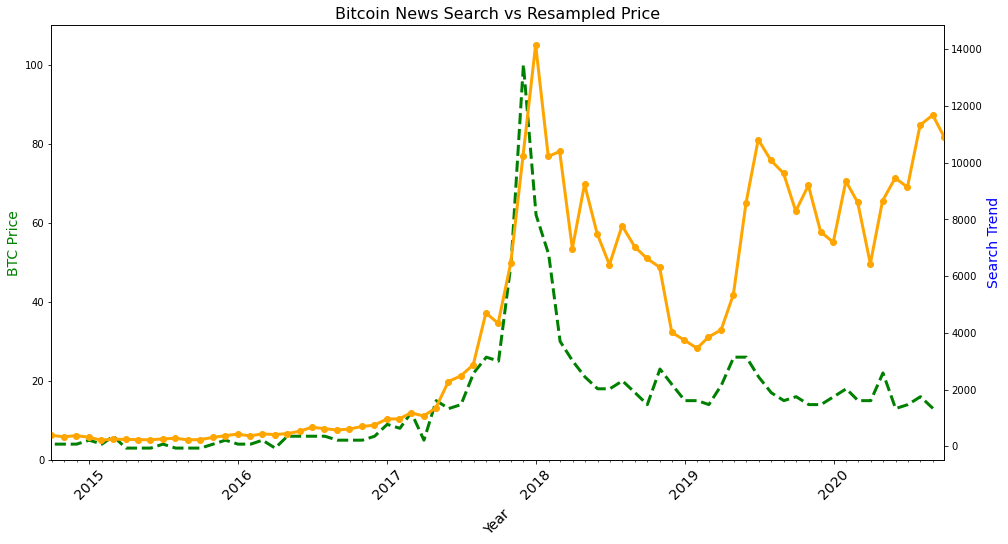

In [176]:
plt.figure(figsize=(16, 8))
plt.title("Bitcoin News Search vs Resampled Price", fontsize=16)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlabel("Year", rotation=45, fontsize=14)
ax1.set_ylabel("BTC Price", fontsize=14, color="green")
ax2.set_ylabel("Search Trend", fontsize=14, color="blue")

years = mdates.YearLocator()
years_fmt = mdates.DateFormatter("%Y")
months = mdates.MonthLocator()
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim([0, df_btc_search.BTC_NEWS_SEARCH.max() + 10])
ax1.set_xlim([df_btc_monthly["MONTH"].min(), df_btc_monthly["MONTH"].max()])

ax1.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH, color="green", linewidth=3, linestyle="--")
ax2.plot(df_btc_monthly.MONTH, df_btc_monthly.CLOSE, linewidth=3, color="orange", marker="o")

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

In [194]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


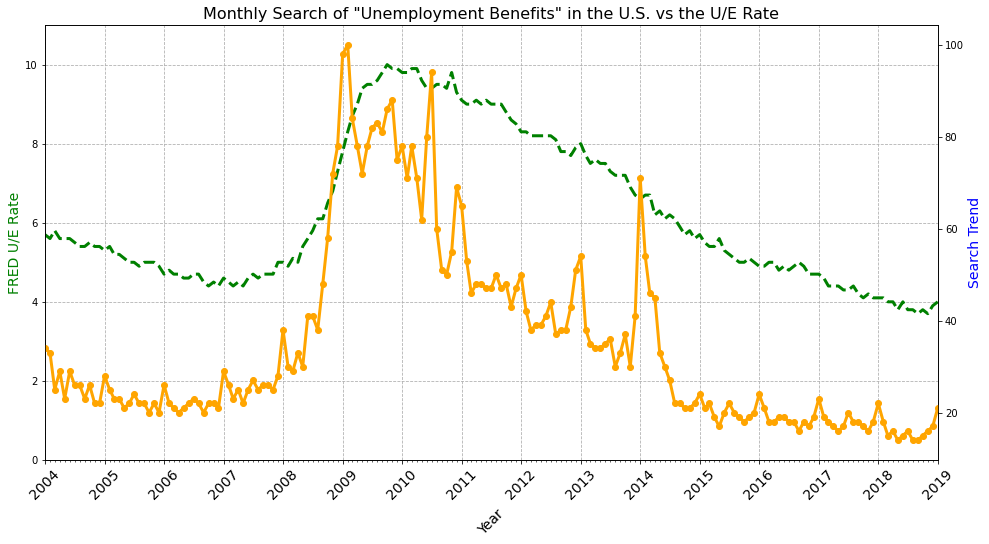

In [191]:
plt.figure(figsize=(16, 8))
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.grid(linestyle="--")

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlabel("Year", rotation=45, fontsize=14)
ax1.set_ylabel("FRED U/E Rate", fontsize=14, color="green")
ax2.set_ylabel("Search Trend", fontsize=14, color="blue")

years = mdates.YearLocator()
years_fmt = mdates.DateFormatter("%Y")
months = mdates.MonthLocator()
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim([0, df_unemployment.UNRATE.max()+1])
ax1.set_xlim([df_unemployment["MONTH"].min(), df_unemployment["MONTH"].max()])

ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color="green", linewidth=3, linestyle="--")
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, linewidth=3, color="orange", marker="o")

### Unemployement Benefits Search vs. Actual Unemployment in the U.S. using a rolled dataframe (window 6)

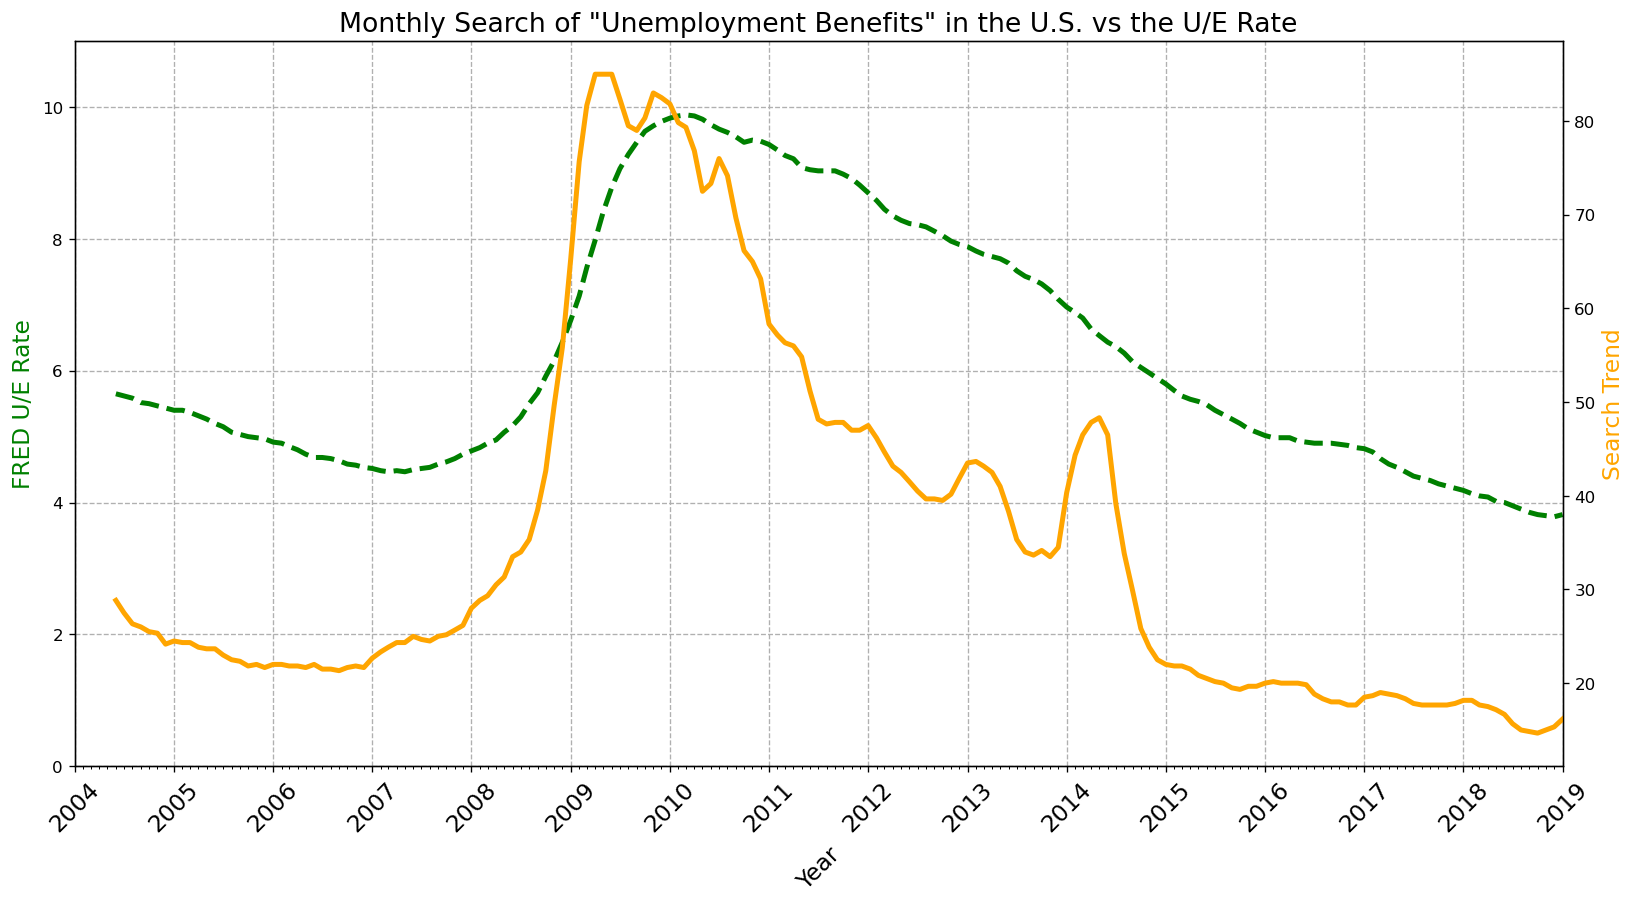

In [217]:

plt.figure(figsize=(16, 8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.grid(linestyle="--")

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlabel("Year", rotation=45, fontsize=14)
ax1.set_ylabel("FRED U/E Rate", fontsize=14, color="green")
ax2.set_ylabel("Search Trend", fontsize=14, color="orange")

years = mdates.YearLocator()
years_fmt = mdates.DateFormatter("%Y")
months = mdates.MonthLocator()
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylim([0, df_unemployment.UNRATE.max()+1])
ax1.set_xlim([df_unemployment["MONTH"].min(), df_unemployment["MONTH"].max()])

roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, color="green", linewidth=3, linestyle="--")
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, linewidth=3, color="orange")

roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

### Including the year 2020 in Unemployment Charts

In [222]:
ue_df = pd.read_csv("UE Benefits Search vs UE Rate 2004-20.csv")
ue_df["MONTH"] = pd.to_datetime(ue_df["MONTH"])
ue_df.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,9,5.7
1,2004-02-01,8,5.6
2,2004-03-01,7,5.8
3,2004-04-01,8,5.6
4,2004-05-01,6,5.6


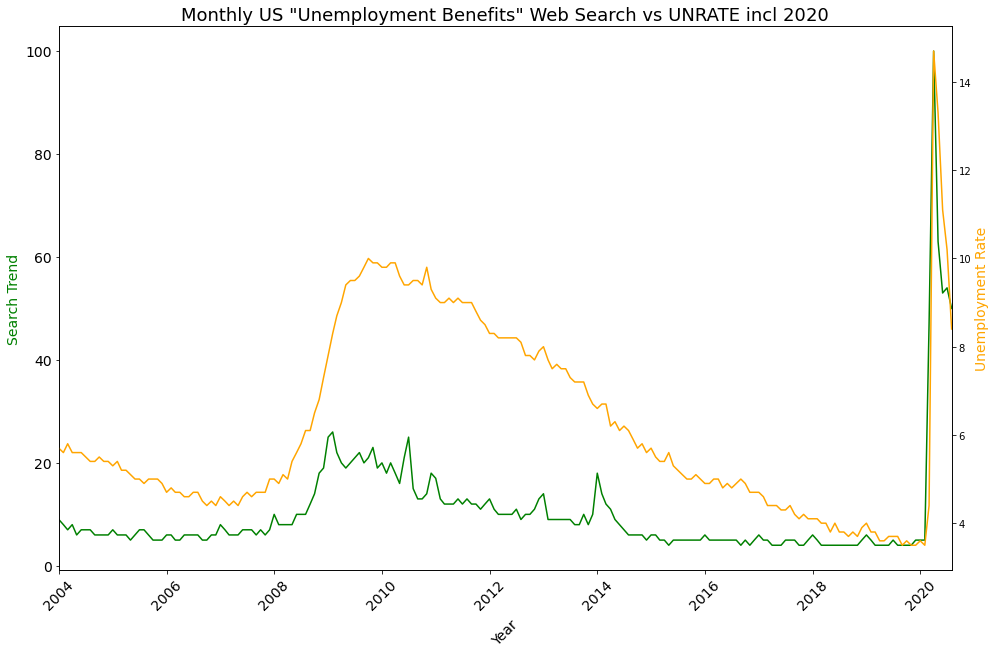

In [252]:
plt.figure(figsize=(16,10))
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlabel("Year", rotation=45, fontsize=14)
ax1.set_ylabel("Search Trend", fontsize=14, color="green")
ax2.set_ylabel("Unemployment Rate", fontsize=14, color="orange")

ax1.set_xlim([ue_df.MONTH.min(), ue_df.MONTH.max()])

ax1.plot(ue_df.MONTH, ue_df.UE_BENEFITS_WEB_SEARCH, color="green")
ax2.plot(ue_df.MONTH, ue_df.UNRATE, color="orange")